https://zhuanlan.zhihu.com/p/648898531

In [1]:
import numpy as np

import seaborn as sns

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# 加载数据，对数据进行基本处理

In [2]:
iris = load_iris()

In [3]:
x_train, x_val, y_train, y_val = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)
x_train.shape, x_val.shape

((120, 4), (30, 4))

<AxesSubplot: ylabel='count'>

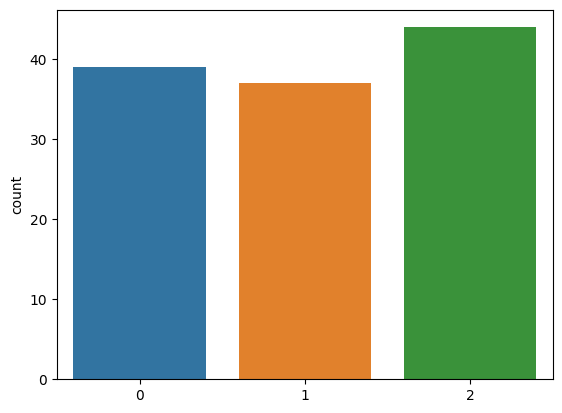

In [4]:
sns.countplot(x=y_train)

# 模型训练

## 参数

1. Bagging框架参数

下面来看看RF重要的Bagging框架的参数，由于RandomForestClassifier和RandomForestRegressor参数绝大部分相同，这里会将它们一起讲，不同点会指出。

1) `n_estimators`: 弱学习器（决策树）的个数。一般来说n_estimators太小，容易欠拟合，n_estimators太大，计算量会太大，并且n_estimators到一定的数量后，再增大n_estimators获得的模型提升会很小，所以一般选择一个适中的数值。默认是100。

2) `oob_score`: 即是否采用袋外样本来评估模型的好坏。默认False。推荐设置为True，因为袋外分数反应了一个模型拟合后的泛化能力。


从上面可以看出, RF重要的框架参数比较少，主要需要关注的是 n_estimators，即森林中决策树的个数。

2. 决策树参数

下面我们再来看RF的决策树参数:

1) `criterion`: 评估指标
    - regressor: Literal['squared_error', 'absolute_error', 'friedman_mse', 'poisson'] = "squared_error", 默认均方误差
    - classifier: Literal['gini', 'entropy', 'log_loss'] = "gini", 默认基尼系数
    <br>refer https://zhuanlan.zhihu.com/p/648898531, https://zhuanlan.zhihu.com/p/643591914

2) `max_features`: RF划分时考虑的最大特征数，就是之前提到的“在每个节点处，从M中随机选择m个特征维度”中的那个m。默认是"auto",意味着每个节点在划分时随机考虑 $\sqrt M$ 个特征；如果是"log2"意味着划分时随机考虑 $log_2^M$ 个特征；如果是整数，代表考虑的特征绝对数。如果是浮点数，代表考虑特征百分比，即考虑 $百分比*总特征维度$ 数取整后的特征数。一般用默认的"auto"就可以了；如果特征数非常多，可以灵活使用刚才描述的其他取值来控制划分时考虑的最大特征数，以控制决策树的生成时间。

3) `max_depth`: 决策树最大深度，默认可以不输入，如果不输入的话，决策树在建立子树的时候不会限制子树的深度。一般来说，数据少或者特征少的时候可以不管这个值。如果模型样本量多，特征也多的情况下，推荐限制这个最大深度，具体的取值取决于数据的分布。常用的可以取值10-100之间。

4) `min_samples_split`: 内部节点再划分所需最小样本数，这个值限制了子树继续划分的条件，如果某节点的样本数少于min_samples_split，则不会继续再划分。默认是2。如果样本量数量级非常大，则推荐增大这个值。

5) `min_samples_leaf`: 叶子节点最少样本数，这个值限制了叶子节点最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被剪枝，只保留原来的父节点。默认是1。如果样本量数量级非常大，则推荐增大这个值。

6) `min_weight_fraction_leaf`: 叶子节点最小的样本权重，这个值限制了叶子节点所有样本权重和的最小值，如果小于这个值，则会和兄弟节点一起被剪枝，只保留原来的父节点。 默认是0，就是不考虑权重问题。如果我们有较多样本有缺失值，或者分类树样本的分布类别非常不平衡，就会引入样本权重，这时我们就要注意这个值了。

7) `max_leaf_nodes`: 最大叶子节点数，通过限制最大叶子节点数，可以防止过拟合，默认是"None”，即不限制最大的叶子节点数。如果加了限制，算法会建立在最大叶子节点数内最优的决策树。如果特征非常多的话，可以加以限制，具体的值可以通过交叉验证得到。

8) `min_impurity_split`: 点划分最小不纯度，这个值限制了决策树的增长，如果某节点的不纯度(基于基尼系数，均方差)小于这个阈值，则该节点不再生成子节点。即为叶子节点 。一般不推荐改动，默认值1e-7。

上面决策树参数中最重要的包括最大特征数max_features， 最大深度max_depth， 内部节点再划分所需最小样本数min_samples_split和叶子节点最少样本数min_samples_leaf。

## 回归模型 RandomForestRegressor

In [5]:
rfr = RandomForestRegressor(n_estimators=100, oob_score=True)

In [6]:
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [7]:
rfr.score(x_val, y_val)

0.9862556701030928

## 分类模型 RandomForestClassifier

In [8]:
rfc = RandomForestClassifier(n_estimators=100, oob_score=True, criterion="entropy")

In [9]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [10]:
rfc.score(x_val, y_val)

1.0

In [11]:
rfc.predict(x_val)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [12]:
rfc.predict_proba(x_val)

array([[0.  , 0.  , 1.  ],
       [0.  , 0.94, 0.06],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.94, 0.06],
       [0.  , 1.  , 0.  ],
       [0.  , 0.43, 0.57],
       [0.  , 0.98, 0.02],
       [0.  , 1.  , 0.  ],
       [0.  , 0.93, 0.07],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.98, 0.02],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.15, 0.85],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [0.  , 0.17, 0.83],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.95, 0.05],
       [1.  , 0.  , 0.  ]])

In [13]:
rfc.predict_log_proba(x_val)

d:\Miniconda3\envs\pytorch\lib\site-packages\sklearn\ensemble\_forest.py:911: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


array([[       -inf,        -inf,  0.        ],
       [       -inf, -0.0618754 , -2.81341072],
       [ 0.        ,        -inf,        -inf],
       [       -inf,        -inf,  0.        ],
       [ 0.        ,        -inf,        -inf],
       [       -inf,        -inf,  0.        ],
       [ 0.        ,        -inf,        -inf],
       [       -inf,  0.        ,        -inf],
       [       -inf, -0.0618754 , -2.81341072],
       [       -inf,  0.        ,        -inf],
       [       -inf, -0.84397007, -0.56211892],
       [       -inf, -0.02020271, -3.91202301],
       [       -inf,  0.        ,        -inf],
       [       -inf, -0.07257069, -2.65926004],
       [       -inf,  0.        ,        -inf],
       [ 0.        ,        -inf,        -inf],
       [       -inf, -0.02020271, -3.91202301],
       [       -inf,  0.        ,        -inf],
       [ 0.        ,        -inf,        -inf],
       [ 0.        ,        -inf,        -inf],
       [       -inf, -1.89711998, -0.162

## 获取特征重要性 feature_importances_
特征重要性,按照列名排序

In [14]:
rfc.feature_importances_

array([0.10025785, 0.02891579, 0.39116447, 0.47966189])

# 网格搜索 GridSearchCV

In [17]:
cbc_gs = RandomForestClassifier()

In [18]:
param_grid = {
    "n_estimators":     np.arange(160, 181, 10),
    "max_features":     np.arange(5, 11, 5),
    "max_depth":        np.arange(20, 41, 10),
    "min_samples_leaf": np.arange(1, 3, 1),
}

In [19]:
gs = GridSearchCV(cbc_gs, param_grid, cv=4)

In [20]:
gs.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([20, 30, 40]),
                         'max_features': array([ 5, 10]),
                         'min_samples_leaf': array([1, 2]),
                         'n_estimators': array([160, 170, 180])})

In [21]:
gs.score(x_val, y_val)

1.0

In [22]:
# 获取最好的参数,参数从parma_grid中找
print('Best parameters found by grid search are:', gs.best_params_)

Best parameters found by grid search are: {'max_depth': 20, 'max_features': 5, 'min_samples_leaf': 1, 'n_estimators': 160}


# 确定最好模型

In [23]:
best_rfc = RandomForestClassifier(**gs.best_params_)

In [24]:
best_rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, max_features=5, n_estimators=160)

In [25]:
best_rfc.score(x_val, y_val)

1.0